# Homework 5: Regression with Gaussian Processes

------------------------------------------------------
*Machine Learning, Master in Big Data Analytics, 2017-2018*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

The aim of this homework is to solve a real data problem using the Gaussian Process implementation of GPy. The documentation of GPy is avaialable from the [SheffieldML github page](https://github.com/SheffieldML/GPy) or from [this page](http://gpy.readthedocs.org/en/latest/). 

The problem is the prediction of the house prices using the Housing Data Set from  <a href = https://archive.ics.uci.edu/ml/datasets/Housing>  UCI repository</a> that you can also download from scikit learn <a href = http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html> here</a>.


### 1. Loading and preparing the data (1 point)

* Download the dataset
* Divide the dataset into train (400) and test (106) datasets
* Check the range of prices in the train and test datasets

In [1]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import numpy as np
# This is really cool, I discover this very recently. Nicer than %matplotlib inline
%matplotlib notebook 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(type(boston))

<class 'sklearn.utils.Bunch'>


In [3]:
trainX, testX = train_test_split(boston.data, train_size=0.8, random_state=24)
trainY, testY = train_test_split(boston.target, train_size=0.8, random_state=24)

 C:\Users\fra12\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:From version 0.21, test_size will always complement train_size unless both are specified.


In [4]:
print "The range of price in the training set is: {} - {}".format(np.amin(trainY),np.amax(trainY))
print "The range of price in the test set is: {} - {}".format(np.amin(testY),np.amax(testY))

The range of price in the training set is: 5.0 - 50.0
The range of price in the test set is: 5.0 - 50.0


In [5]:
trainY = np.transpose(np.asarray([trainY]))
testY = np.transpose(np.asarray([testY]))

### 2. Setting and optimizing the model

On the training data set:

a) Build a GP regression model based on a RBF kernel with ARD, in which each input dimension is weighted with a different lengthscale. This enhances interpretability. **2 points**

b) Fit the covariance function parameters and noise to the data. **1 point** 

c) Plot the parameters found for the covariance function. What variables are more important for the regression? **2 points**

On the test data set:

d) Plot and evaluate the prediction error using the opmitized parameters. **2 points**

2) Try to combine various covariance functions using the element-wise product or the sum of two kernels, and repeat steps b) and c). Comments the results. **2 points**

In this [link](http://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/basic_kernels.ipynb) you can see how to define differnt kernels and operate with them.

__SOLUTION__<br>
a) Build a GP regression model based on a RBF kernel with ARD, in which each input dimension is weighted with a different lengthscale. This enhances interpretability. <br>

First let's build the kernels, put them into the GP Regressor and optimize the model:

In [6]:
ker1 = GPy.kern.RBF(13,ARD=True)
m1 = GPy.models.GPRegression(trainX,trainY, ker1)
m1.optimize(messages=True,max_f_eval = 1000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s11  0001   6.121142e+04   7.313242e+08 
    01s54  0024   1.150666e+03   1.141268e+02 
Runtime:     01s54
Optimization status: Converged



b) Fit the covariance function parameters and noise to the data.

In [7]:
display(m1)

GP_regression.,value,constraints,priors
rbf.variance,326.393067386,+ve,
rbf.lengthscale,"(13L,)",+ve,
Gaussian_noise.variance,5.14059638323,+ve,


In [8]:
lv = ker1.lengthscale.values
ker2 = GPy.kern.RBF(13,ARD=True, lengthscale=lv, variance=326.393067386) + GPy.kern.White(13, variance=5.14059638323)
m2 = GPy.models.GPRegression(trainX,trainY, ker2)
m2.optimize(messages=True,max_f_eval = 1000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s17  0003   1.540730e+03   1.920078e+04 
    03s28  0056   1.057605e+03   2.173726e+00 
    04s32  0071   1.054146e+03   3.257462e-02 
    05s32  0088   1.053545e+03   6.988382e-03 
    09s50  0170   1.052196e+03   1.839548e-02 
    26s01  0518   1.038747e+03   2.194094e-04 
    36s35  0736   1.038498e+03   4.934121e-04 
    36s54  0740   1.038498e+03   4.559544e-06 
Runtime:     36s54
Optimization status: Converged



c) Plot the parameters found for the covariance function. What variables are more important for the regression? <br>
Let's check the different lengthscales:

In [9]:
display(ker2.rbf.lengthscale)

index,GP_regression.sum.rbf.lengthscale,constraints,priors
[0],4.90207060,+ve,
[1],6214.89328931,+ve,
[2],3013.11775437,+ve,
[3],519.96087788,+ve,
[4],0.71890075,+ve,
[5],3.32421768,+ve,
[6],418.48599737,+ve,
[7],8.76351440,+ve,
[8],86.67375008,+ve,
[9],293.29375150,+ve,


In [10]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The most important variable is __NOX__ (nitric oxides concentration), followed by __RM__ (average # of rooms per dwelling), __CRIM__ (per capita crime rate by town) etc, while the least useful ones are __ZN__ (proportion of residential land zoned for lots) and __B__ (proportion of blacks by town).

<IPython.core.display.Javascript object>


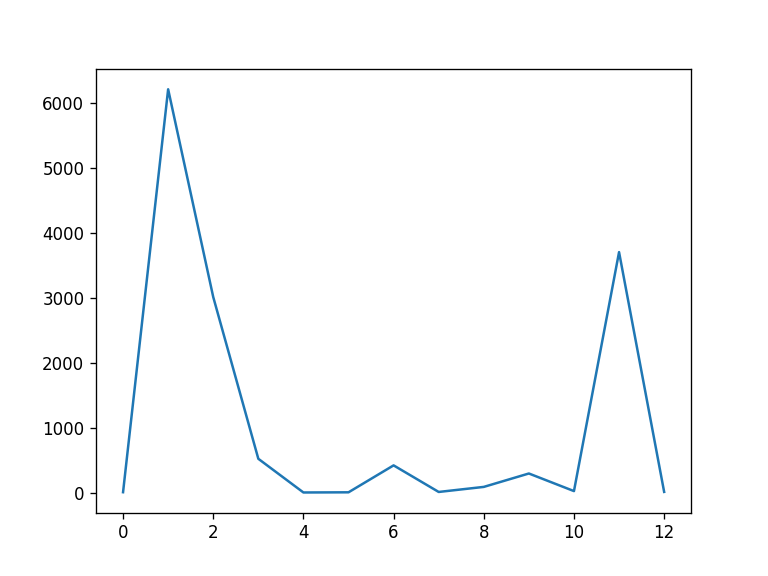

In [25]:
k = ker2.rbf.lengthscale
plt.figure()
plt.plot(k)
plt.show()

On the test set: <br>
d) Plot and evaluate the prediction error using the opmitized parameters.

<IPython.core.display.Javascript object>


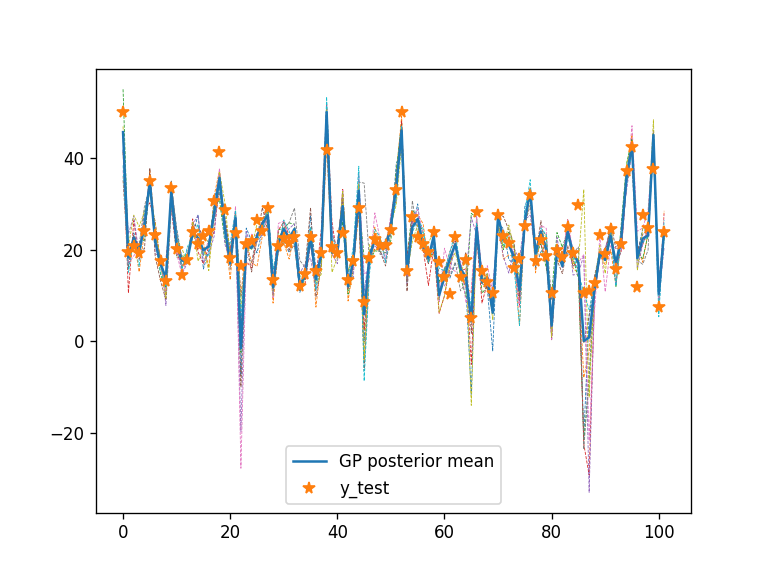

In [24]:
posterior_testY = m2.posterior_samples_f(testX, full_cov=True)
mean_testY,_ = m2.predict(testX,full_cov=True)
%matplotlib notebook 

plt.plot(posterior_testY,'--',lw=0.5)
plt.plot(mean_testY,label='GP posterior mean')
plt.plot(testY,'*',ms=7,label='y_test')
plt.legend()


In [14]:
print "The R squared for m1 is {}".format(r2_score(testY, mean_testY))

The R squared for m1 is 0.787819097224


2) Try to combine various covariance functions using the element-wise product or the sum of two kernels, and repeat steps b) and c). Comments the results.

In [15]:
# Sum of kernels
k1 = GPy.kern.RBF(13, ARD=True)
k2 = GPy.kern.Matern52(13)
k_sum = k1 + k2
k = k_sum.rbf.lengthscale
mSum = GPy.models.GPRegression(trainX,trainY,k_sum)
mSum.optimize(messages=True,max_f_eval = 1000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s10  0001   4.097162e+04   2.150813e+08 
    02s18  0023   1.343662e+03   1.410110e+04 
    04s21  0045   1.142343e+03   3.583653e+00 
Runtime:     04s21
Optimization status: Converged



In [16]:
mSum

GP_regression.,value,constraints,priors
sum.rbf.variance,73.0179718229,+ve,
sum.rbf.lengthscale,"(13L,)",+ve,
sum.Mat52.variance,252.104491066,+ve,
sum.Mat52.lengthscale,210.761121191,+ve,
Gaussian_noise.variance,2.46297416299,+ve,


In [17]:
# Sum of kernels
lv= mSum.sum.rbf.lengthscale
k1 = GPy.kern.RBF(13, ARD=True, variance=73.0179718229, lengthscale = lv)
k2 = GPy.kern.Matern52(13, variance = 252.104491066,lengthscale = 210.761121191)
k_sum = k1 + k2 + GPy.kern.White(13, variance = 2.46297416299)
mSum = GPy.models.GPRegression(trainX,trainY,k_sum)
mSum.optimize(messages=True,max_f_eval = 1000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s10  0001   1.145929e+03   4.430063e+01 
    03s48  0034   1.141934e+03   7.426683e-02 
Runtime:     03s48
Optimization status: Converged



In [18]:
posterior_testY = mSum.posterior_samples_f(testX, full_cov=True)
mean_testY,_ = mSum.predict(testX,full_cov=True)
print(r2_score(testY, mean_testY))

0.830206593873


With the sum of kernels we obtained lower error predictions, compared to the perfomances of *m2*. 

<IPython.core.display.Javascript object>


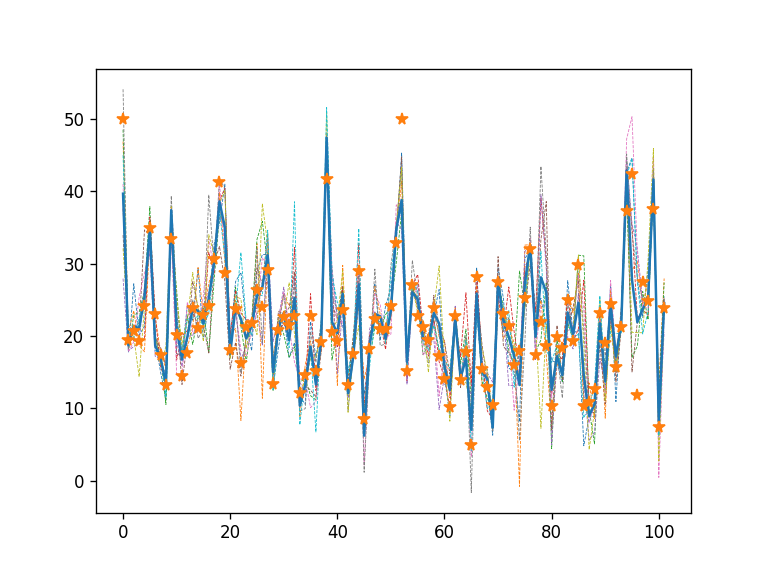

In [23]:
plt.figure()
plt.plot(posterior_testY,'--',lw=0.5)
plt.plot(mean_testY,label='GP posterior mean')
plt.plot(testY,'*',ms=7,label='y_test')
plt.show()

In [20]:
mSum.sum.rbf.lengthscale

index,GP_regression.sum.rbf.lengthscale,constraints,priors
[0],71.22424053,+ve,
[1],1.00000097,+ve,
[2],1.09146208,+ve,
[3],18.96274766,+ve,
[4],0.00000033,+ve,
[5],1.30499612,+ve,
[6],150.96287929,+ve,
[7],14.33729711,+ve,
[8],0.99667022,+ve,
[9],1.11349068,+ve,


<IPython.core.display.Javascript object>


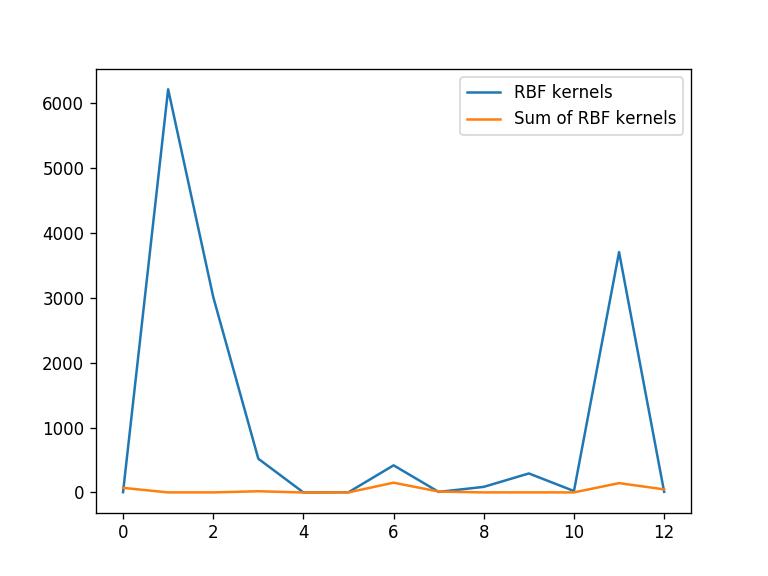

In [21]:
%matplotlib notebook 
k1 = ker2.rbf.lengthscale
k2= mSum.sum.rbf.lengthscale
plt.figure()
plt.plot(k1, label="RBF kernels")
plt.plot(k2, label="Sum of RBF kernels")
plt.legend()
plt.show()

When using a sum of kernels the model improves in interpretability since the lengthscale values are significatevely lower, except from some variables such as __B__, which represents the proportion of blacks by town and was already detected by the *m2* model as non relevant.

### Sparse GP implementation (optional)

Try to implement an sparse version of the GP regressor, optimized to find a set of **inducing points** that the GP relies on to do the prediction. Measure the test error prediction for 20, 40, and 100 inducing points.

In [22]:
for i in (20,40,100):
    model = GPy.models.SparseGPRegression(trainX, trainY, num_inducing=i)
    model.optimize('bfgs')
    posteriorYSparse = model.posterior_samples_f(testX)
    mean_y_testSparse,_ = model.predict(testX)
    print ('For {} inducing points the R2 value is {}'.format(i, r2_score(testY, mean_y_testSparse))) 

For 20 inducing points the R2 value is -6.99849397548


 C:\Users\fra12\Anaconda2\lib\site-packages\GPy\core\gp.py:590: RuntimeWarning:covariance is not positive-semidefinite.


For 40 inducing points the R2 value is 0.73977734734
For 100 inducing points the R2 value is 0.790408405485


We can see that using more inducing points the GP the prediction error actually decreases.